# **Markov clustering algorithm: Tuning the hyperparameters**

**MCL hyperparameters:**
* Inflation
* Expansion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('/home/sebastiaan/PhD/Repositories/clusTCR/')

from clustcr import Clustering, datasets

In [2]:
# plot styling
plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.rc('font', family='serif')
sns.set_palette('Set1')
sns.set_context('paper', font_scale=1.3)    # single-column figure

In [3]:
# Data
cdr3 = datasets.vdjdb_beta()
epitopes = datasets.vdjdb_beta(epitopes=True)

In [32]:
import time

# Generate list of hyperparameter pairs to test
params = []
param_1 = np.round(np.arange(1.2,2.1,0.1),1)
param_2 = np.round(np.arange(2,11,1),0)
for i in param_1:
    for j in param_2:
        params.append([i, j])
        
# Scan hyperparameter space
res = []
for pair in params:
    t0 = time.time()
    mcl = Clustering(mcl_params=pair, n_cpus=8).fit(cdr3)
    t1 = time.time()
    print(t1-t0)
    clusters = mcl.clusters_df
    metrics = mcl.metrics(epitopes)
    summ = metrics.summary()
    summ['inflation'] = pair[0]
    summ['expansion'] = pair[1]
    summ['time'] = t1 - t0
    res.append(summ)
    
# Write output to file
res = pd.concat(res)
res.to_csv('./results/mcl_hyperparameters.tsv', sep='\t', index=False)

4.622931480407715
6.421886444091797
8.353696584701538
11.910281419754028
15.158870220184326
18.848297595977783
20.346022129058838
23.194334983825684
25.160563707351685
3.3428966999053955
4.095762491226196
6.167798042297363
7.9704718589782715
10.815155744552612
14.685380458831787
16.485000610351562
18.91839361190796
21.5639705657959
2.5777478218078613
3.410101890563965
4.675536394119263
6.5795464515686035
8.161524772644043
11.040194272994995
13.65957760810852
15.950837135314941
18.969725370407104
2.5933992862701416
3.0798721313476562
4.148947477340698
5.17638897895813
7.134373664855957
9.553057193756104
13.061941623687744
14.168276309967041
16.73391819000244
2.1648881435394287
2.856747627258301
3.602438449859619
4.883763551712036
6.06059718132019
8.074759721755981
10.556124687194824
12.43733263015747
14.598487138748169
2.405052900314331
2.600517988204956
3.125645399093628
4.075796842575073
5.371418237686157
6.778722286224365
9.110238552093506
11.483329772949219
14.435128450393677
2.1362

In [33]:
res

,actual,baseline,metrics,inflation,expansion,time
0,0.278943,0.278943,retention,1.2,2,4.622931
1,0.558216,0.347210,purity,1.2,2,4.622931
2,0.370494,0.060748,purity_90,1.2,2,4.622931
3,0.116762,0.045694,consistency,1.2,2,4.622931
0,0.278943,0.278943,retention,1.2,3,6.421886
...,...,...,...,...,...,...
3,0.117091,0.047671,consistency,2.0,9,8.043911
0,0.278943,0.278943,retention,2.0,10,10.347881
1,0.555470,0.344903,purity,2.0,10,10.347881
2,0.370321,0.070187,purity_90,2.0,10,10.347881


## Plot results

In [20]:
np.arange(len(inflation))[::2]

array([0, 2, 4, 6, 8])

In [51]:
data

,actual,baseline,metrics,inflation,expansion,time
0,0.278943,0.278943,retention,1.2,2,4.622931
1,0.558216,0.347210,purity,1.2,2,4.622931
2,0.370494,0.060748,purity_90,1.2,2,4.622931
3,0.116762,0.045694,consistency,1.2,2,4.622931
4,0.278943,0.278943,retention,1.2,3,6.421886
...,...,...,...,...,...,...
319,0.117091,0.047671,consistency,2.0,9,8.043911
320,0.278943,0.278943,retention,2.0,10,10.347881
321,0.555470,0.344903,purity,2.0,10,10.347881
322,0.370321,0.070187,purity_90,2.0,10,10.347881


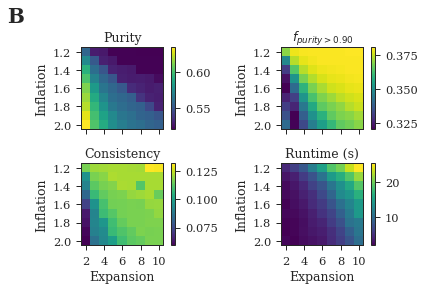

In [62]:
data = pd.read_csv('./results/mcl_hyperparameters.tsv', sep='\t')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2)

# Purity

metric_data = data[data['metrics']=='purity']
inflation = np.round(metric_data.inflation.unique(),1)
expansion = metric_data.expansion.unique()
values = np.asarray(metric_data.pivot(index="inflation", columns="expansion", values="actual"))

im = ax1.imshow(values, cmap='viridis')

ax1.set_xticks(np.arange(len(expansion))[::2])
ax1.set_yticks(np.arange(len(inflation))[::2])
ax1.set_xticklabels("")
ax1.set_yticklabels(inflation[::2])
ax1.set_xlabel('')
ax1.set_ylabel('Inflation')

fig.colorbar(im, ax=ax1)
# for i in range(len(inflation)):
#     for j in range(len(expansion)):
#         text = ax1.text(j, i, np.round(values[i, j], 2), ha="center", va="center", color="w")

ax1.set_title("Purity")

# Purity_90

metric_data = data[data['metrics']=='purity_90']
inflation = np.round(metric_data.inflation.unique(),1)
expansion = metric_data.expansion.unique()
values = np.asarray(metric_data.pivot(index="inflation", columns="expansion", values="actual"))

im = ax2.imshow(values, cmap='viridis')

ax2.set_xticks(np.arange(len(expansion))[::2])
ax2.set_yticks(np.arange(len(inflation))[::2])
ax2.set_xticklabels("")
ax2.set_yticklabels(inflation[::2])
ax2.set_xlabel('')
ax2.set_ylabel('Inflation')

fig.colorbar(im, ax=ax2)

ax2.set_title(r"$f_{purity > 0.90}$")

# Consistency

metric_data = data[data['metrics']=='consistency']
inflation = np.round(metric_data.inflation.unique(),1)
expansion = metric_data.expansion.unique()
values = np.asarray(metric_data.pivot(index="inflation", columns="expansion", values="actual"))

im = ax3.imshow(values, cmap='viridis')

ax3.set_xticks(np.arange(len(expansion))[::2])
ax3.set_yticks(np.arange(len(inflation))[::2])
ax3.set_xticklabels(expansion[::2])
ax3.set_yticklabels(inflation[::2])
ax3.set_xlabel('Expansion')
ax3.set_ylabel('Inflation')
fig.colorbar(im, ax=ax3)

ax3.set_title("Consistency")


metric_data = data[data['metrics']=='retention']
inflation = np.round(metric_data.inflation.unique(),1)
expansion = metric_data.expansion.unique()
values = np.asarray(metric_data.pivot(index="inflation", columns="expansion", values="time"))

im = ax4.imshow(values, cmap='viridis')

ax4.set_xticks(np.arange(len(expansion))[::2])
ax4.set_yticks(np.arange(len(inflation))[::2])
ax4.set_xticklabels(expansion[::2])
ax4.set_yticklabels(inflation[::2])
ax4.set_xlabel('Expansion')
ax4.set_ylabel('Inflation')
# ax3.cbar()
fig.colorbar(im, ax=ax4)

ax4.set_title("Runtime (s)")

ax1.text(-0.7, 1.5, 'B', transform=ax1.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
# ax2.text(-0.1, -.2, 'B', transform=ax1.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
# ax3.text(-0.1, -1.5, 'C', transform=ax1.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
# fig.subplots_adjust(hspace=.3)

fig.tight_layout()
fig.savefig('results/figures/mcl_hyperparameters.eps', format='eps', bbox_inches='tight')

In [6]:
data = pd.read_csv('results/mcl_hyperparameters.tsv', sep='\t')

def plot_hyperparameters_metric(data, metric, title=None):
    
    metric_data = data[data['metrics']==metric]
    inflation = metric_data.inflation.unique()
    expansion = metric_data.expansion.unique()
    values = np.asarray(metric_data.pivot(index="inflation", columns="expansion", values="actual"))
    
    fig, ax = plt.subplots(figsize=(10,6))
    im = ax.imshow(values, cmap='viridis')
    
    ax.set_xticks(np.arange(len(expansion)))
    ax.set_yticks(np.arange(len(inflation)))
    ax.set_xticklabels(expansion)
    ax.set_yticklabels(inflation)
    ax.set_xlabel('Expansion', fontsize=18)
    ax.set_ylabel('Inflation', fontsize=18)
    
    for i in range(len(inflation)):
        for j in range(len(expansion)):
            text = ax.text(j, i, np.round(values[i, j], 2), ha="center", va="center", color="w")
    
    ax.set_title("MCL hyperparameters - {}".format(metric), fontsize=26)
    fig.tight_layout()
    fig.savefig("results/figures/mcl_{}.eps".format(metric), format="eps")
    
    plt.show()

### PURITY

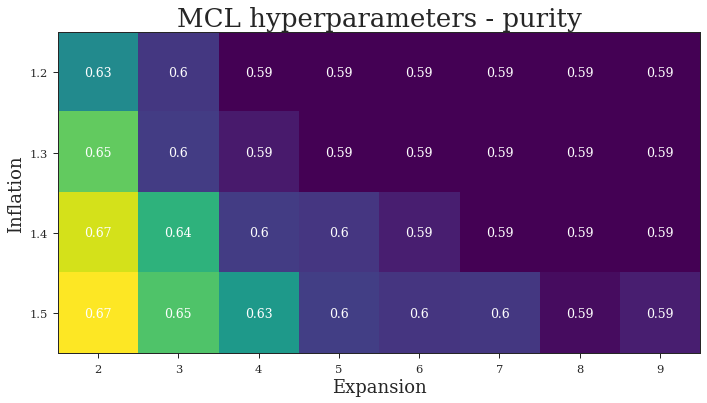

In [9]:
plot_hyperparameters_metric(data, 'purity')

### PURITY_90

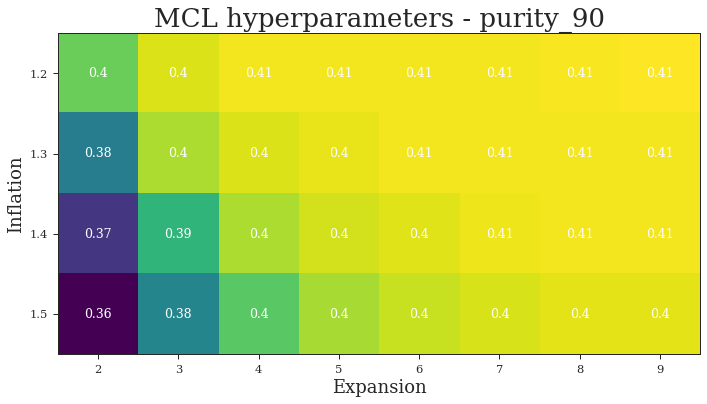

In [10]:
plot_hyperparameters_metric(data, 'purity_90')

### CONSISTENCY

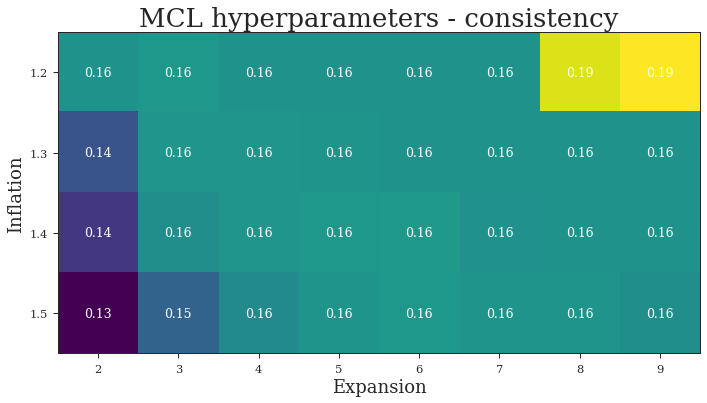

In [11]:
plot_hyperparameters_metric(data, 'consistency')